In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.signal import wiener
import rebin_function

%matplotlib inline

Load data

In [17]:
dfNm = 'LCLS_Analysis_vd_out.csv'
dfArray = np.genfromtxt(dfNm, delimiter=',', skip_header=1)
EnLoss_b2 = dfArray[:, 0]
Diff2ps_b2 = dfArray[:, 5]
DiffErr2ps_b2 = dfArray[:, 6]
Neg10ps_b2_amp = dfArray[:, 8]
NegErr10ps_b2_amp = dfArray[:, 10]
Diff10ps_b2_amp = dfArray[:, 11]
DiffErr10ps_b2_amp = dfArray[:, 12]
EnLossQE_b2 = dfArray[:, 13]

Plot

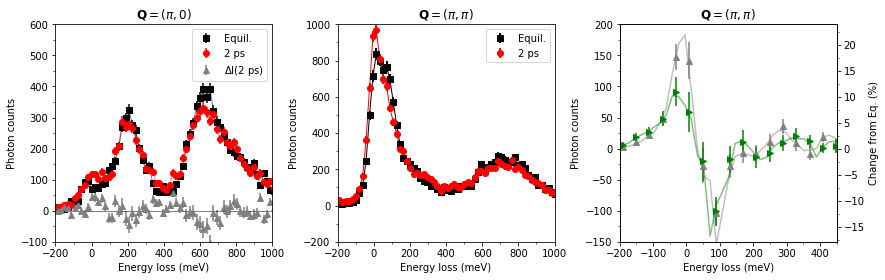

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# pi 0 absolute signals
ax = axs[0]
ax.plot(EnLossQE_b2*1000, dfArray[:, 14], 'r-', lw=1, alpha=0.5)
ax.plot(EnLossQE_b2*1000, dfArray[:, 15], 'k-', lw=1, alpha=0.5)
ax.errorbar(EnLossQE_b2*1000, dfArray[:, 15], yerr=dfArray[:, 17], fmt='ks', label='Equil.')
ax.errorbar(EnLossQE_b2*1000, dfArray[:, 14], yerr=dfArray[:, 16], fmt='ro', label='2 ps')
ax.errorbar(EnLossQE_b2*1000, dfArray[:, 18], yerr=dfArray[:, 19], fmt='^', color=[0.5,0.5,0.5], label='$\Delta$I(2 ps)')
ax.plot([-100, 1000], [0 , 0], 'k-', alpha=0.5, lw=1)
ax.set_xlim([-200, 1000])
ax.set_ylim([-100, 600])
ax.set_title(r'${\bf Q}=(\pi,0)$')
ax.legend()

# pi pi absolute signals
ax = axs[1]
ax.plot(EnLoss_b2*1000, Neg10ps_b2_amp, 'k-', lw=1)
ax.plot(EnLoss_b2*1000, dfArray[:, 1], 'r-', lw=1)
ax.errorbar(EnLoss_b2*1000, Neg10ps_b2_amp, yerr=NegErr10ps_b2_amp, fmt='ks', lw=2, label='Equil.')
ax.errorbar(EnLoss_b2*1000, dfArray[:, 1], yerr=dfArray[:, 3], fmt='ro', lw=2, label='2 ps')

ax.plot([EnLoss_b2[-1], EnLoss_b2[0]], [0 , 0], 'k--', lw=2)
ax.set_xlim([-200, 1000])
ax.set_ylim([-200, 1000])
ax.set_title(r'${\bf Q}=(\pi,\pi)$')
ax.legend()


# Difference plot
plt.plot(EnLoss_b2*1000, wiener(Diff2ps_b2), '-', color=[0.5,0.5,0.5], alpha=0.5, linewidth=1.5)
x, y, e = rebin_function.rebin(EnLoss_b2*1000, Diff2ps_b2, DiffErr2ps_b2, 40)
plt.errorbar(x, y, yerr=e, fmt='^',  color=[0.5,0.5,0.5],
             label='$\Delta$I(2 ps)')

plt.plot(EnLoss_b2*1000, wiener(Diff10ps_b2_amp), '-', color='green', alpha=0.5, linewidth=1.5)
x, y, e = rebin_function.rebin(EnLoss_b2*1000, Diff10ps_b2_amp, DiffErr10ps_b2_amp, 40)
plt.errorbar(x, y, yerr=e, fmt='>', color='green',
             label='$\Delta$I(10 ps)')

xlim_ax_r = [-200, 450]
plt.xlim(xlim_ax_r)
ylim_ax_r = [-150, 200]
plt.ylim(ylim_ax_r)
plt.xlabel('Energy Loss (meV)')
plt.ylabel('Photon Counts') 
plt.title(r'${\bf Q}=(\pi,\pi)$')


scalefac = 100./np.max(Neg10ps_b2_amp)

ax_r_pc=axs[2].twinx()
ax_r_pc.set_ylim(ylim_ax_r[0]*scalefac, ylim_ax_r[1]*scalefac)
#ax_r_pc.set_yticks( range(int(y1-273.15), int(y2-273.15), 2) )
ax_r_pc.set_ylabel('Celsius')
ax_r_pc.set_xlim(xlim_ax_r)
ax_r_pc.set_ylabel('Change from Eq. (%)')
ax_r_pc.yaxis.set_minor_locator(AutoMinorLocator(2))

for ax in axs:
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Photon counts')
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))


fig.subplots_adjust(wspace=.3)